In [1]:
import mg5qs_import as qs
from pathlib import Path
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
import subprocess

In [2]:
MG5_PATH = Path(os.getenv('MG5QS_MG5_PATH'))
INPUT_PATH = Path(os.getenv('MG5QS_INPUT_PATH'))

In [3]:
qs.edit_card_spec(INPUT_PATH / 'proc_card.dat')

#************************************************************
#*                        MadGraph 5                        *
#*                                                          *
#*                *                       *                 *
#*                  *        * *        *                   *
#*                    * * * * 5 * * * *                     *
#*                  *        * *        *                   *
#*                *                       *                 *
#*                                                          *
#*                                                          *
#*    The MadGraph Development Team - Please visit us at    *
#*    https://server06.fynu.ucl.ac.be/projects/madgraph     *
#*                                                          *
#************************************************************
#*                                                          *
#*               Command File for MadGraph 5                *
#*      

Text(value='import model sm', layout=Layout(width='550px'))

# Define multiparticle labels


Text(value='define p = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define j = g u c d s u~ c~ d~ s~', layout=Layout(width='550px'))

Text(value='define l+ = e+ mu+', layout=Layout(width='550px'))

Text(value='define l- = e- mu-', layout=Layout(width='550px'))

Text(value='define vl = ve vm vt', layout=Layout(width='550px'))

Text(value='define vl~ = ve~ vm~ vt~', layout=Layout(width='550px'))

# Specify process(es) to run


Text(value='generate p p > e- ve~ @1', layout=Layout(width='550px'))

Text(value='add process p p > e- ve~ j @2', layout=Layout(width='550px'))

Text(value='add process p p > t t~ @3', layout=Layout(width='550px'))

# Output processes to MadEvent directory


Text(value='output A', layout=Layout(width='550px'))

# This will create a directory PROC_$MODELNAME_$X
# If you want to specify the path/name of the directory use
# output PATH

# To generate events, you can go to the created directory and
# run ./bin/generate_events


Button(description='Save', style=ButtonStyle())

Output()

In [4]:
output_name, OUTPUT_PATH = qs.run_MG5(MG5_PATH, INPUT_PATH)

In [5]:
card = qs.ParamCard(OUTPUT_PATH)

In [6]:
shutil.copy(card.path / 'param_card.dat', card.path / 'param_card.bak')

for MH in np.linspace(75, 175, 2):
    shutil.copy(card.path / 'param_card.bak', card.path / 'param_card.dat')  # start with the origional card 
    card.set_value('MASS', 25, MH)  # set the new value 
    card.write(overwrite=True)      # write to p_c.out 
    os.rename(card.path / 'param_card.out', card.path / 'param_card.dat')  # copy over p_c.dat
    
    print('Working on MH =', MH, '...')
    # Build the command
    command = f"{OUTPUT_PATH / 'bin/generate_events'} -f < {INPUT_PATH / 'gen_event_input.mg5'}"
    # Execute the command, changing the working directory
    try:
        result = subprocess.run(command, shell=True, check=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print("Process completed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Process failed with error: {e}")
        print(card.dfs()['MASS'], '\n')
    print('MH =', MH, ' complete')

shutil.copy(card.path / 'param_card.bak', card.path / 'param_card.dat')  # restore the origional card
os.remove(card.path / 'param_card.bak')   # cleanup any resadue

wrote: /home/leo/MadStats/mg5qs/output/A/Cards/param_card.out
Working on MH = 75.0 ...
Process completed successfully.
MH = 75.0  complete
wrote: /home/leo/MadStats/mg5qs/output/A/Cards/param_card.out
Working on MH = 175.0 ...
Process completed successfully.
MH = 175.0  complete


In [8]:
LHEs = qs.get_LHEs(OUTPUT_PATH)
results = {}

for LHE in LHEs:
    results[str(LHE)] = qs.generate_pT(15, 10000, LHE)


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.311      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change:  8 Mar 2024  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 28 Aug 2024 at 13:17:04    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

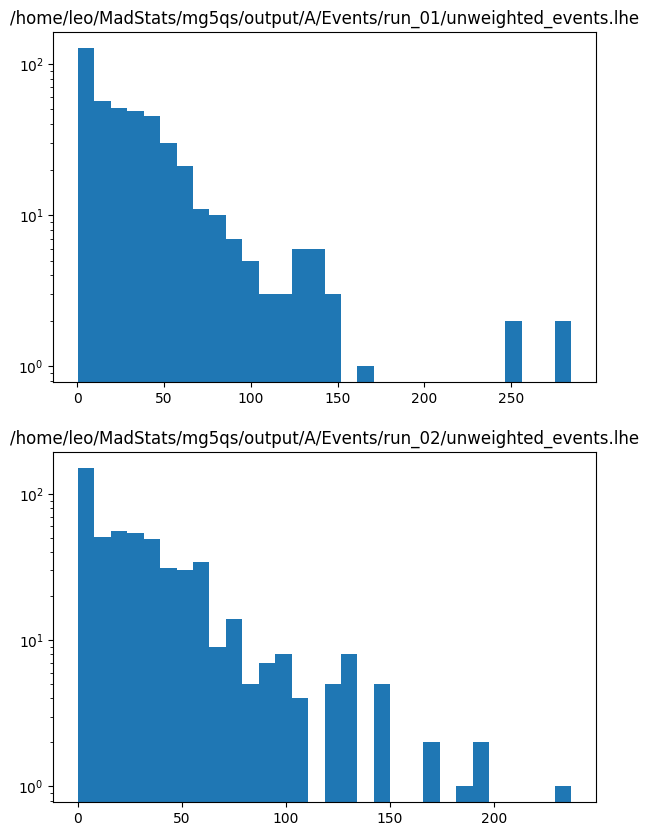

In [10]:
fig, ax = plt.subplots(len(results), figsize=(7, len(results)*5))

ks = [key for key in results.keys()]

for i, k in enumerate(sorted(ks)):
    ax[i].hist(results[k][1], bins=30)
    ax[i].set_title(k)
    ax[i].set_yscale('log')
plt.show()